In [28]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
import warnings
import re
import string
warnings.filterwarnings('ignore')

In [29]:
df_crime = pd.read_csv('../Data/THR_DLR_CLA_V2_Primary_Full_EA.csv')
df_crime

,News Title,News_Intro,News_Desc,News_All,Gambling,Murder,Sexual Abuse,Theft/Burglary,Drug,Battery/Assault,Accident,Non-Crime
0,ตร.นนท์จับหนุ่มแท็กซี่ขโมยเนื้อหมูของร้านตามสั...,ตำรวจ สภ.รัตนาธิเบศร์ จับกุมโชเฟอร์แท็กซี่ตามห...,ตำรวจ สภ.รัตนาธิเบศร์ จับกุมโชเฟอร์แท็กซี่ตามห...,ตร.นนท์จับหนุ่มแท็กซี่ขโมยเนื้อหมูของร้านตามสั...,0,0,0,1,0,0,0,0
1,"ครอบครัว ""ฮ้อแสงชัย"" เชื่อคดี ""เบนซ์ชนฟอร์ด"" จ...",น้องสาวและครอบครัวฮ้อแสงชัย ขอบคุณกระบวนการยุต...,น้องสาวและครอบครัวฮ้อแสงชัย ขอบคุณกระบวนการยุต...,"ครอบครัว ""ฮ้อแสงชัย"" เชื่อคดี ""เบนซ์ชนฟอร์ด"" จ...",0,0,0,0,0,0,1,0
2,ตร.แจง ดารากุเรื่องเป็นเซียนหวย อาจเข้าข่ายผิด...,รองโฆษก ตร.แจงกรณีสื่อแฉดาราสร้างเรื่องหลอกลวง...,รองโฆษก ตร.แจงกรณีสื่อแฉดาราสร้างเรื่องหลอกลวง...,ตร.แจง ดารากุเรื่องเป็นเซียนหวย อาจเข้าข่ายผิด...,0,0,0,0,0,0,0,1
3,หนุ่มชาวบ้านที่ถูกยิงดับใต้สะพานที่บาเจาะ ตร.ค...,พบศพหนุ่มวัย 22 ปี ถูกยิงด้วยปืน 9 มม. ตาย 1 ศ...,พบศพหนุ่มวัย 22 ปี ถูกยิงด้วยปืน 9 มม. ตาย 1 ศ...,หนุ่มชาวบ้านที่ถูกยิงดับใต้สะพานที่บาเจาะ ตร.ค...,0,1,0,0,1,0,0,0
4,ผกก.สายไหม มอบสิ่งของผู้สูงอายุ เนื่องในวันเฉล...,ผกก.สน.สายไหม นำทีมข้าราชการตำรวจในสังกัด และเ...,ผกก.สน.สายไหม นำทีมข้าราชการตำรวจในสังกัด และเ...,ผกก.สายไหม มอบสิ่งของผู้สูงอายุ เนื่องในวันเฉล...,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8562,ตร.แจง ดารากุเรื่องเป็นเซียนหวย อาจเข้าข่ายผิด...,รองโฆษก ตร.แจงกรณีสื่อแฉดาราสร้างเรื่องหลอกลวง...,รองโฆษก ตร.แจงกรณีสื่อแฉดาราสร้างเรื่องหลอกลวง...,ตร.แจง ดารากุเรื่องเป็นเซียนหวย อาจเข้าข่ายผิด...,0,0,0,0,0,0,0,1
8563,หนุ่มชาวบ้านที่ถูกยิงดับใต้สะพานที่บาเจาะ ตร.ค...,พบศพหนุ่มวัย 22 ปี ถูกยิงด้วยปืน 9 มม. ตาย 1 ศ...,พบศพหนุ่มวัย 22 ปี ถูกยิงด้วยปืน 9 มม. ตาย 1 ศ...,หนุ่มชาวบ้านที่ถูกยิงดับใต้สะพานที่บาเจาะ ตร.ค...,0,1,0,0,1,1,0,0
8564,ผกก.สายไหม มอบสิ่งของผู้สูงอายุ เนื่องในวันเฉล...,ผกก.สน.สายไหม นำทีมข้าราชการตำรวจในสังกัด และเ...,ผกก.สน.สายไหม นำทีมข้าราชการตำรวจในสังกัด และเ...,ผกก.สายไหม มอบสิ่งของผู้สูงอายุ เนื่องในวันเฉล...,0,0,0,0,0,0,0,1
8565,ในหลวงพระราชทานตราสัญลักษณ์ประจำหน่วยปฏิบัติกา...,พล.ต.ต.จิรภพ ภูริเดช ผบก.ป. พร้อมข้าราชการตำรว...,พล.ต.ต.จิรภพ ภูริเดช ผบก.ป. พร้อมข้าราชการตำรว...,ในหลวงพระราชทานตราสัญลักษณ์ประจำหน่วยปฏิบัติกา...,0,0,0,0,0,0,0,1


In [34]:
# 0:1 = title, 1:2 = Intro, 2:3 = Desc, 3:4 = All, 4: Labels <Target>
X = df_crime.iloc[:,3:4].values
Y = df_crime.iloc[:, 4:].values

In [35]:
len(Y[334])
Y[334]

array([0, 0, 0, 0, 1, 0, 0, 0])

In [36]:
def clean_msg(msg):
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    msg = re.sub(r'<.*?>','', msg)
    # ลบ hashtag
    msg = re.sub(r'#','',msg)
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        msg = re.sub(r'\{}'.format(c),'',msg)
    # ลบ separator เช่น \n \t
    msg = ' '.join(msg.split())
    return msg

In [37]:
clean_text_arr = []
for i in range(len(X)):
    clean_text = clean_msg(X[i][0])
    clean_text_arr.append(clean_text)

In [38]:
arr = []
for i in range(len(X)):
    token = word_tokenize(clean_text_arr[i], keep_whitespace=False)
    arr.append(token)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
tokens_list_j = [','.join(tkn) for tkn in arr]
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat = cvec.fit_transform(tokens_list_j)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(analyzer=lambda x:x.split(','))
t_feat = tvec.fit_transform(tokens_list_j)

In [41]:
TFIDF_Data = t_feat.toarray()

In [42]:
# Labellist_1 = ['Murder','Battery/Assault','Sexual Abuse','Drug','Gambling','Theft/Burglary','Accident','Non-Crime']
# Labellist = ['Gambling','Murder','Sexual Abuse','Theft/Burglary','Drug','Battery/Assault','Accident','Non-Crime']
# # MUR > BAT > SEX > DRG > GAM > THF > ACC > NON
# # 0      1     2     3     4     5     6     7
# Label_Priority = [5,1,3,6,4,2,6,7]

# def prority_index(cate):
#     for i in range(8):
#         if cate == Labellist_1[i]:
#             return i

# Y_Label = []
# for i in range(len(Y)):
#     print(i)
#     Temp_label = []
#     for j in range(8):
#         if Y[i][j] == 1:
#             Temp_label.append(Labellist[j])
#     if len(Temp_label) == 1:
#         Y_Label.append(Temp_label[0])
#     else:
#         # ! Sort the Founded labels based on Label_Priority
#         Temp_label.sort(key = prority_index)
#         print(Temp_label)
#         Y_Label.append(Temp_label[0])

In [43]:
Y_label_data = np.array(Y)

In [44]:
Y_label_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from skmultilearn.model_selection import iterative_train_test_split
Kfold_classification_report_data = []
Y_Ground_Truth_data = []
Y_Predicted_data = []
np.random.seed(42)
X_train, y_train, X_test, y_test = iterative_train_test_split(TFIDF_Data, Y_label_data, test_size=0.2)
# Create Model and Train the model
# clf_Kfold = svm.LinearSVC(random_state=0).fit(X_train, y_train)
clf_Kfold = MultinomialNB()
clf_Kfold = MultiOutputClassifier(clf_Kfold)
clf_Kfold.fit(X_train,y_train)
# Predict the result (Test the model)
result = clf_Kfold.predict(X_test)

# Collect data from each ML model <10 KFold = 10 models>
# Y_Ground_Truth_data.append(y_test)
# Y_Predicted_data.append(result)
# Kfold_classification_report_data.append(classification_report(y_test, result,output_dict = True))

In [46]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [47]:
Labellist = ['Gambling','Murder','Sexual Abuse','Theft/Burglary','Drug','Battery/Assault','Accident','Non-Crime']
print(classification_report(y_test, result,target_names=Labellist))

                 precision    recall  f1-score   support

       Gambling       0.00      0.00      0.00        50
         Murder       0.94      0.24      0.38       511
   Sexual Abuse       0.00      0.00      0.00       135
 Theft/Burglary       0.00      0.00      0.00       155
           Drug       1.00      0.00      0.01       208
Battery/Assault       1.00      0.00      0.01       378
       Accident       0.00      0.00      0.00       144
      Non-Crime       1.00      0.10      0.18       281

      micro avg       0.95      0.08      0.15      1862
      macro avg       0.49      0.04      0.07      1862
   weighted avg       0.72      0.08      0.13      1862
    samples avg       0.09      0.08      0.08      1862



# ROC

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area for each class
n_classes = len(df_crime.columns[5:])
print(n_classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], result[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], result[:, i])

df_crime.columns[5:]

7


Index(['Murder', 'Sexual Abuse', 'Theft/Burglary', 'Drug', 'Battery/Assault',
       'Accident', 'Non-Crime'],
      dtype='object')

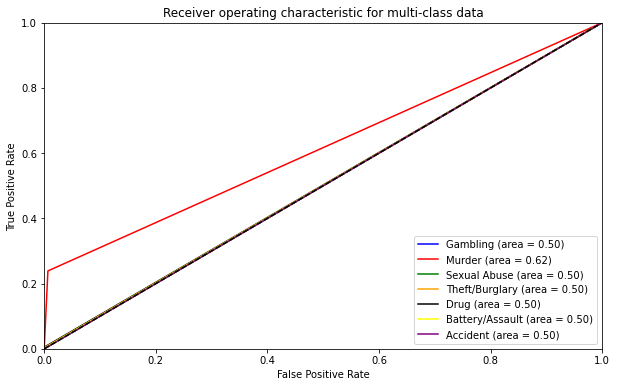

In [49]:
from itertools import cycle
import matplotlib.pyplot as plt
news_label = ['Gambling', 'Murder', 'Sexual Abuse', 'Theft/Burglary', 'Drug', 'Battery/Assault', 'Accident', 'Non-Crime']
colors = cycle(['blue', 'red', 'green', 'orange', 'black', 'yellow', 'purple', 'pink', 'grey'])
plt.figure(figsize=(10,6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=1.5, label=f'{news_label[i]} (area = {roc_auc[i]:.2f})')
#     plt.plot(fpr[i], tpr[i], color=color, linewidth=1.5, label=f'ROC curve of class {news_label[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [50]:
from sklearn.metrics import multilabel_confusion_matrix
Confusion_Matrix_Result = multilabel_confusion_matrix(y_test,result)

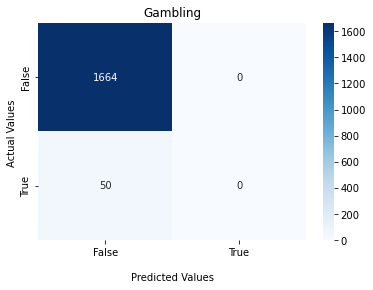

In [51]:
import seaborn as sns

ax = sns.heatmap(Confusion_Matrix_Result[0], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[0]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

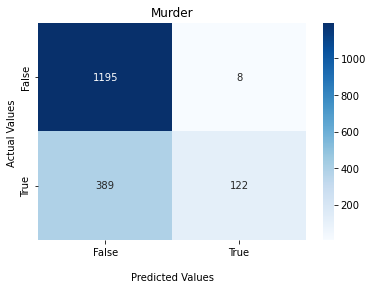

In [52]:
ax = sns.heatmap(Confusion_Matrix_Result[1], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[1]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

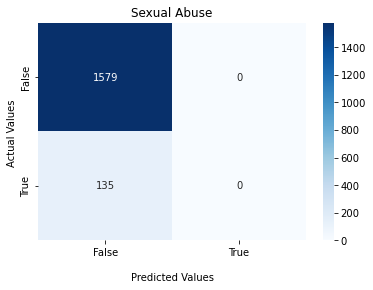

In [53]:
ax = sns.heatmap(Confusion_Matrix_Result[2], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[2]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

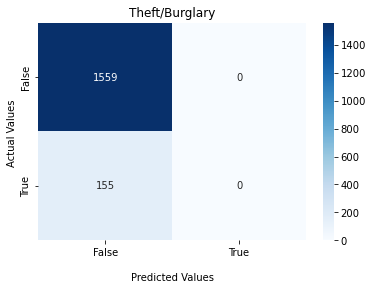

In [54]:
ax = sns.heatmap(Confusion_Matrix_Result[3], annot=True, cmap='Blues',fmt='g')

ax.set_title(news_label[3]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

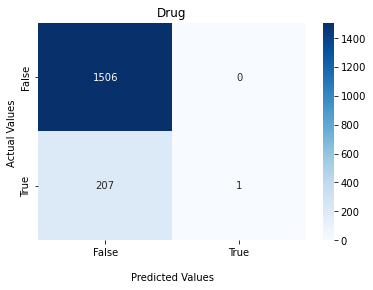

In [55]:
ax = sns.heatmap(Confusion_Matrix_Result[4], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[4]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

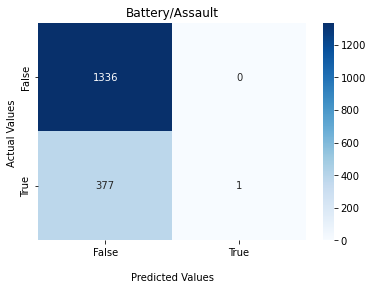

In [56]:
ax = sns.heatmap(Confusion_Matrix_Result[5], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[5]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

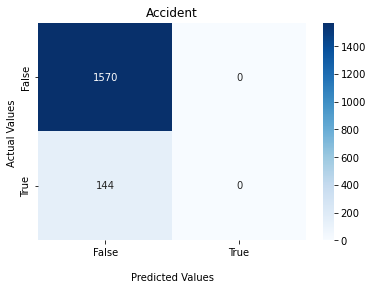

In [57]:
ax = sns.heatmap(Confusion_Matrix_Result[6], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[6]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

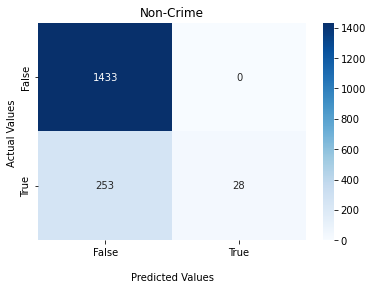

In [58]:
ax = sns.heatmap(Confusion_Matrix_Result[7], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[7]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()